## Autor: José Miguel Ramírez Sanz
## Descripción: notebook con pruebas y obtención del esqueleto sin la imagen de fondo. Esqueleto en blanco y negro.

In [1]:
# imports
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import math
import os
import pandas as pd
import pickle as pk
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# import de utilities de detectron
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

### Carga del modelo

In [2]:
#modelo
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.99  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [6]:
#carga de imagen de prueba
imagen = cv2.imread("./imagenes-prueba/p.jpeg")
out = predictor(imagen)

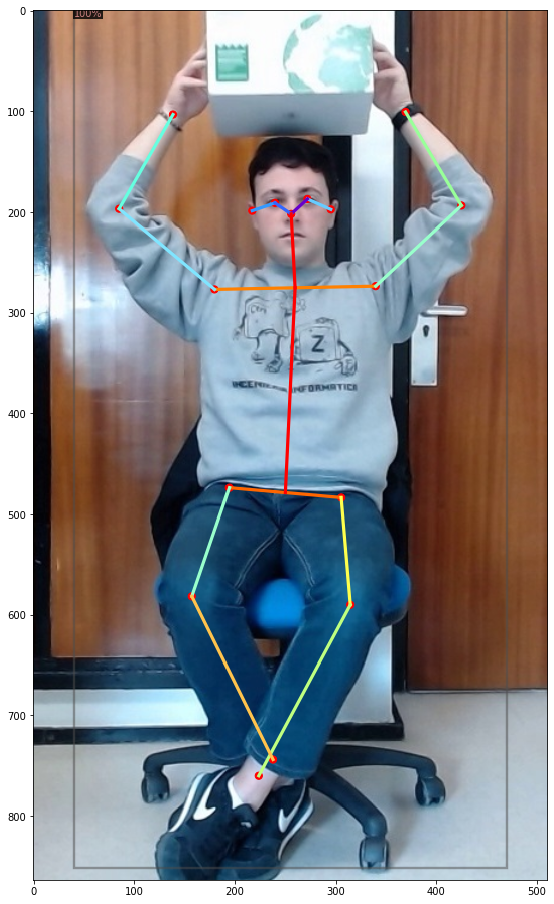

In [7]:
#imagen con esqueleto
v = Visualizer(imagen[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(out["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

### Esqueleto con fondo blanco

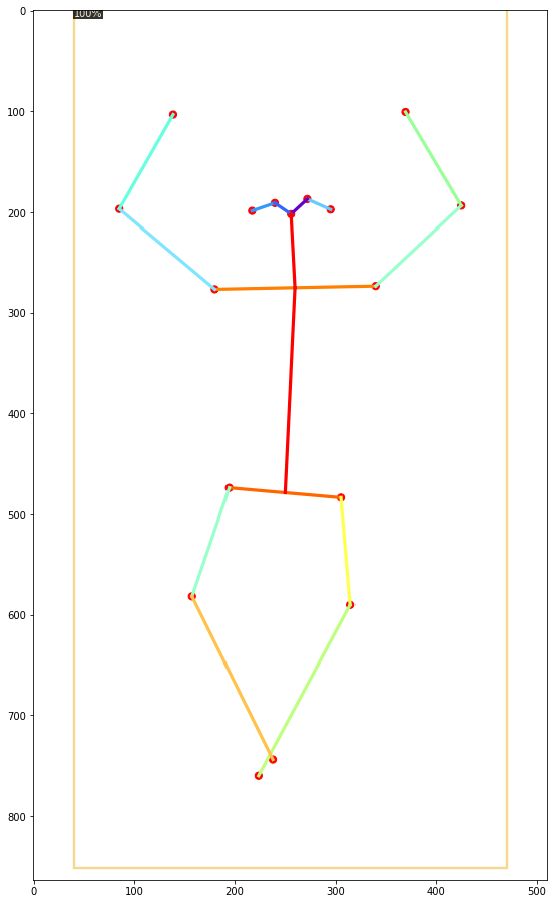

In [8]:
#imagen solo con esqueleto
v = Visualizer(np.full(imagen.shape,256)[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(out["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

### Esqueleto con fondo negro

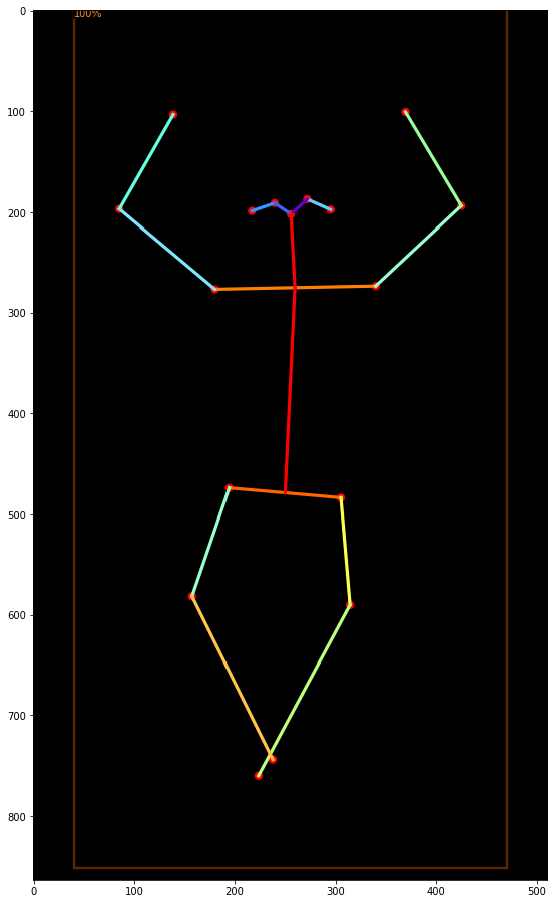

In [9]:
#imagen solo con esqueleto
v = Visualizer(np.zeros(imagen.shape)[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v2 = v.draw_instance_predictions(out["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v2.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()